# L20 Instructor guide

Breast cancer is one of the leading causes of cancer-related deaths worldwide, with its prognosis and treatment response varying significantly among patients.
Advances in transcriptomics allow us to study gene expression levels and identify patterns that contribute to these differences.
By analyzing this data, we can uncover valuable insights into the genetic underpinnings of breast cancer outcomes.

In this activity, we will explore a processed subset of the [METABRIC dataset](https://www.nature.com/articles/nature10983), focusing on patients with invasive ductal carcinoma who underwent mastectomy without chemotherapy or radiotherapy.
The data includes gene expression levels for 489 genes and survival outcomes for 278 patients (139 survivors and 139 non-survivors).

The data is provided three ways:

- [Google Sheets][google-sheets],
- [Excel](https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/20/metabric-gene-expression.xlsx),
- [NumPy gene expression](https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/20/metabric-gene-expression.npy) and [NumPy gene names](https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/20/metabric-gene-names.npy).

[google-sheets]: https://docs.google.com/spreadsheets/d/1gyke4S53kKFnJB2ojUnaeoFhBWy8vlr6fOVDaUoEMco/edit?usp=sharing

## Understanding our data

In gene expression analysis, especially when comparing tumor samples to a reference population, it is essential to quantify how much a gene's expression deviates from a standard or normal level.
The **z-score** metric provides a standardized way to measure this deviation.
By converting gene expression levels into z-scores, researchers can compare different genes and samples on a common scale, facilitating the identification of significant changes in gene expression associated with disease states.

The z-score for a gene's expression in a tumor sample is calculated using the following formula:

$$
z = \frac{X_{\text{tumor}} - \mu_{\text{reference}}}{\sigma_{\text{reference}}}
$$

Where:

- $X_{\text{tumor}}$ = Expression level of the gene in the **tumor sample**.
- $\mu_{\text{reference}}$ = **Mean** expression level of the gene in the **reference population**.
- $\sigma_{\text{reference}}$ = **Standard deviation** of the gene's expression in the **reference population**.

A **z-score of 0** indicates that the gene's expression in the tumor sample is equal to the mean expression in the reference population.
A **positive z-score** signifies that the gene is expressed at a higher level in the tumor sample compared to the reference mean.
A **negative z-score** indicates lower expression in the tumor sample relative to the reference mean.
  
The z-score also reflects how many **standard deviations** the tumor sample's gene expression is from the reference mean.
**Higher absolute values** of the z-score denote greater deviations, which may suggest biological significance.

For example, suppose a gene has:

- Tumor sample expression ($X_{\text{tumor}}$): **18 units**
- Reference mean expression ($\mu_{\text{reference}}$): **10 units**
- Reference standard deviation ($\sigma_{\text{reference}}$): **4 units**

The z-score is calculated as:

$$
z = \frac{18 - 10}{4} = \frac{8}{4} = 2
$$

The gene's expression in the tumor sample is **2 standard deviations above** the mean expression in the reference population, indicating significant upregulation.

The calculation assumes that the gene expression levels in the reference population are approximately normally distributed.

## NumPy

In computational biology, working with multi-dimensional datasets is common, and efficiently handling such data is crucial for meaningful analysis.
NumPy arrays provide a powerful and efficient way to represent and manipulate this data, making them an essential tool in Python.
NumPy significantly accelerates numerical computations compared to standard Python lists by leveraging fixed-size arrays and optimized C libraries, which allow operations to be performed in bulk rather than through slower Python loops.
For example, calculating the mean of a large array using NumPy can be hundreds of times faster than iterating over elements in Python.
Beyond speed, NumPy also uses less memory and offers concise and intuitive syntax for working with complex datasets.

First, we import our [NumPy](https://numpy.org/) library.

In [1]:
import numpy as np

At the time of writing, the community has not fully transitioned to NumPy v2, which has breaking changes.
In order to check what [NumPy](https://numpy.org/) version you are using, you can print the version.

In [2]:
print(np.__version__)

2.1.2


Google colab has [v1.26](https://numpy.org/doc/1.26/) as the default.

## Loading data

We have two arrays for this worksheet:

1. **`gene_express`**: Contains the gene expression data for two groups of patients (survivors and non-survivors) across 489 genes.
2. **`gene_names`**: A 1D array that contains the names of these 489 genes.

If you were working on your local computer, you can simply load NumPy array with the [`np.load()`](https://numpy.org/doc/1.26/reference/generated/numpy.load.html) function.

```python
np.load("metabric-gene-expression.npy")
```

In [3]:
import io
from urllib import request

GE_NPY_PATH = "https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/20/metabric-gene-expression.npy"
GN_NPY_PATH = "https://github.com/oasci-courses/pitt-biosc1540-2024f/raw/refs/heads/main/content/lectures/20/metabric-gene-names.npy"

response = request.urlopen(GE_NPY_PATH)
content = response.read()
gene_express = np.load(io.BytesIO(content))

response = request.urlopen(GN_NPY_PATH)
content = response.read()
gene_names = np.load(io.BytesIO(content))

## Dimensions and shape

The **shape** of a NumPy array is a fundamental concept that describes its structure and organization.
It tells us how many elements the array contains along each dimension, which is crucial for understanding and manipulating multi-dimensional data.
For example, a 1D array's shape reflects its length, a 2D array's shape shows the number of rows and columns, and higher-dimensional arrays extend this concept further.
By knowing an array's shape, we can interpret its data more effectively and apply operations to specific parts of it, similar to navigating rows, columns, or sheets in a spreadsheet.

First, let’s take a look at the `gene_names` array to understand its shape and what it contains.


In [4]:
print("Shape of gene_names:", gene_names.shape)

Shape of gene_names: (489,)


This is a one-dimensional array that contains the names of the 489 genes.
Each element in this array corresponds to the gene expression data along the third axis of the `gene_express` array.

In [5]:
print("First 10 gene names:", gene_names[:10])

First 10 gene names: ['brca1' 'brca2' 'palb2' 'pten' 'tp53' 'atm' 'cdh1' 'chek2' 'nbn' 'nf1']


Now, let's look at `gene_express` shape.

In [6]:
print("Shape of gene_express:", gene_express.shape)

Shape of gene_express: (2, 139, 489)


The gene_express array has three dimensions, as indicated by its shape `(2, 139, 489)`, each representing a specific aspect of the dataset:

-   **First Axis (2):** This axis corresponds to the two groups of patients—survivors and non-survivors.
    Conceptually, you can think of this as representing two distinct "categories" or "sheets" in an Excel file.
    Each sheet contains the gene expression data for one patient group.
-   **Second Axis (139):** Within each group (or "sheet"), this axis represents the number of patients.
    Each row corresponds to the data for a specific patient in the group.
-   **Third Axis (489):** For each patient, this axis represents the expression levels of 489 genes.
    These are organized as columns in the Excel sheet, with one column for each gene.

To visualize this structure, imagine an [Excel file][google-sheets] with two sheets:

-   The first sheet contains data for survivors, where each row represents a patient and each column corresponds to the expression level of a specific gene.
-   The second sheet mirrors this setup but for non-survivors.

In NumPy terms, this entire Excel file is represented as a single 3D array, `gene_express`.
The first dimension allows you to switch between the two sheets (survivors and non-survivors), the second dimension corresponds to the rows within a sheet (patients), and the third dimension corresponds to the columns (genes).
This compact representation makes it easy to perform operations across groups, patients, or genes efficiently.


## Slicing and Accessing Data

One of the strengths of NumPy arrays is how easily we can access specific data.
For example:

- To access all the data for survivors, we use slicing on the first axis.
- To extract expression levels for a specific gene across all patients, we slice along the last axis.

The first axis represents the group (0 for survivors, 1 for non-survivors).
To access all gene expression data for survivors:

In [7]:
survivors_data = gene_express[0]
print("Shape of survivors_data:", survivors_data.shape)

Shape of survivors_data: (139, 489)


Here, the shape of `survivors_data` is `(139, 489)`, representing 139 patients and 489 genes.

Let’s say we want to look at the expression levels of the first gene for all patients in the survivors group.
We access it like this:

In [8]:
gene_1_survivors = gene_express[0, :, 0]  # First gene (index 0)
print("Expression levels for first gene (survivors)")
print(gene_1_survivors)

Expression levels for first gene (survivors)
[-5.7120e-01  4.5590e-01 -1.1428e+00  4.3390e-01  6.9220e-01 -7.5200e-02
 -9.0520e-01 -9.8540e-01  5.3850e-01 -5.7980e-01 -4.8240e-01  1.9980e-01
  1.8881e+00 -1.4941e+00 -1.3798e+00  2.6285e+00 -2.9270e-01 -1.9070e-01
  1.5920e-01  1.4118e+00  8.6240e-01 -1.5648e+00 -9.5760e-01  2.2075e+00
  1.2445e+00 -1.1528e+00 -9.5870e-01 -3.0410e-01 -5.1080e-01  1.1960e+00
  5.5480e-01  9.2860e-01  1.2720e+00  1.5868e+00  3.7870e-01 -2.7870e-01
  5.6560e-01  5.9260e-01 -1.7590e-01  1.7390e+00  5.5880e-01  1.1088e+00
  5.7120e-01 -1.9420e-01  2.6680e-01  2.3170e-01 -1.1191e+00  1.1029e+00
  2.4800e-01 -4.7940e-01  4.0130e-01  4.3010e-01 -1.3287e+00 -1.6223e+00
  4.2410e-01 -2.1200e-02  6.4000e-01  6.1990e-01  3.9690e-01 -3.3610e-01
  4.2575e+00 -5.6670e-01 -1.4310e-01 -3.6800e-02 -3.8720e-01 -9.7590e-01
  1.7077e+00 -5.3500e-01 -4.8230e-01 -5.9460e-01 -1.7293e+00 -2.3580e-01
 -8.7510e-01 -6.9060e-01  2.2585e+00  9.2060e-01 -9.4670e-01  3.5770e-01
 -2.01

The `gene_names` array lets us map gene indices to their actual names. For instance, to get the name of the first gene:

In [9]:
print("Name of the first gene:", gene_names[0])

Name of the first gene: brca1


## Descriptive statistics

Since Z-scores are standardized, the overall mean across all genes and samples should be close to zero, and the standard deviation close to one.
However, calculating these statistics can still provide insights into the data.

### Mean

In [ ]:
# Calculate mean Z-scores per gene for each group
mean_zscores_per_gene = np.mean(gene_express, axis=1)  # Shape: (2, 489)

# Extract mean Z-scores for each group
mean_zscores_group0 = mean_zscores_per_gene[0]  # Survivors
mean_zscores_group1 = mean_zscores_per_gene[1]  # Non-survivors

# Print mean Z-score for the first gene in each group
gene_idx = 0
print(f"Mean Z-score of Gene 0 in Survivors: {mean_zscores_group0[gene_idx]:.2f}")
print(f"Mean Z-score of Gene 0 in Non-survivors: {mean_zscores_group1[gene_idx]:.2f}")

Mean Z-score of Gene 0 in Survivors: 0.07
Mean Z-score of Gene 0 in Non-survivors: 0.18


In [11]:
# Compute the difference in mean Z-scores between groups for each gene
delta_zscores = mean_zscores_group0 - mean_zscores_group1  # Shape: (489,)

# Print the difference for the first gene
print(
    f"Difference in Mean Z-scores for Gene 0 (Survivors - Non-survivors): {delta_zscores[0]:.2f}"
)

Difference in Mean Z-scores for Gene 0 (Survivors - Non-survivors): -0.11


## Statistical tests

In [12]:
from scipy import stats

We iterate over each gene (total of 489 genes).
For each gene, we extract the Z-scores for that gene from both groups (arrays of shape (139,)).
We perform a t-test comparing the two independent groups for each gene.
The equal_var=False parameter specifies Welch's t-test, which does not assume equal variances.

In [15]:
# Number of genes
num_genes = gene_express.shape[2]

# Initialize an array to hold p-values
p_values = np.zeros(num_genes)

# Loop over each gene
for i in range(num_genes):
    # Extract Z-scores for the current gene from both groups
    zscores_group0 = gene_express[0, :, i]  # Z-scores for Gene i in Survivors
    zscores_group1 = gene_express[1, :, i]  # Z-scores for Gene i in Non-survivors

    # Perform an independent samples t-test
    t_stat, p = stats.ttest_ind(zscores_group0, zscores_group1, equal_var=False)

    # Store the p-value
    p_values[i] = p

print(p_values[:10])

[3.53306148e-01 9.77898800e-01 4.80810786e-04 8.43520094e-01
 1.82769463e-01 7.02845735e-01 3.76225930e-01 5.37293294e-02
 5.72128985e-01 1.08229503e-03]


In our analysis of gene expression data, we performed statistical tests on a large number of genes to identify those that are differentially expressed between two patient groups (e.g., survivors and non-survivors).
Specifically, we conducted independent t-tests for each of the 489 genes, resulting in a collection of p-values.
However, when conducting multiple hypothesis tests simultaneously, the chance of encountering false positives (Type I errors) increases. To mitigate this issue, we need to adjust the p-values to control for multiple comparisons.

One effective method to address this problem is by controlling the **False Discovery Rate (FDR)**, which is the expected proportion of false positives among all significant results. In our analysis, we utilized the `false_discovery_control` function from the `scipy.stats` module to adjust our p-values and control the FDR using the Benjamini-Hochberg procedure.

The **False Discovery Rate** is a statistical approach used to correct for multiple comparisons in hypothesis testing. Unlike methods that control the **Family-Wise Error Rate (FWER)**—such as the Bonferroni correction, which aims to minimize the chance of any false positives—FDR control procedures allow for a certain proportion of false positives among the rejected hypotheses. This approach increases the statistical power of the tests, enabling the detection of more true positives while maintaining control over the rate of false discoveries.

The **Benjamini-Hochberg (BH) procedure** is a widely used method for controlling the FDR. It adjusts the p-values obtained from multiple hypothesis tests, allowing us to determine which results are statistically significant while controlling the expected proportion of false discoveries.


In [17]:
p_values_adjusted = stats.false_discovery_control(p_values)
print(p_values_adjusted[:10])

[0.62824257 0.99285739 0.03628025 0.95341137 0.45757412 0.87787539
 0.65401614 0.23458609 0.80676691 0.04062479]


## Volcano plot



In [35]:
# Calculate negative log10 of adjusted p-values
log_p_values = -np.log10(p_values_adjusted)

# Handle infinite values (in case p-value is zero)
log_p_values[np.isinf(log_p_values)] = np.max(log_p_values[~np.isinf(log_p_values)]) + 1
print(log_p_values[:10])

[0.20187264 0.00311313 1.44032974 0.02071967 0.33953855 0.05656712
 0.18441154 0.62969774 0.09325192 1.39120892]


In [33]:
fold_change = np.subtract(*np.mean(gene_express, axis=1))
print(fold_change[:10])

[-0.11361367  0.00335036 -0.41807266 -0.02253669  0.15695755 -0.04442302
 -0.09923381  0.20955755  0.06984029 -0.36539281]


In [43]:
significant = p_values_adjusted < 0.05
effect_size_threshold = 1.0

In [29]:
import matplotlib.pyplot as plt

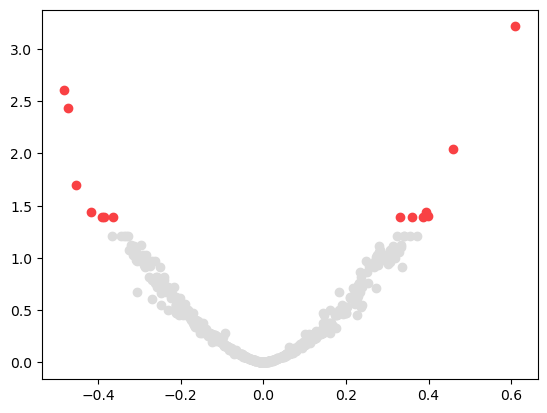

In [47]:
fig, ax = plt.subplots()

ax.scatter(fold_change[~significant], log_p_values[~significant], color="#dcdcdc")
ax.scatter(fold_change[significant], log_p_values[significant], color="#f94144")

In [48]:
print(gene_names[significant])

['palb2' 'nf1' 'jak2' 'stat5a' 'maml1' 'fas' 'folr2' 'mmp11' 'pdgfb'
 'rheb' 'tsc2' 'klrg1' 'npnt' 'ptpn22']


## Heatmap



In [72]:
# Number of top genes to display
top_n = 20
n_patients = 139

# Indices of genes with smallest adjusted p-values
top_genes_indices = np.argsort(p_values_adjusted)[:top_n]
print(top_genes_indices)

[ 52  84 206  48 230 159   2 393 356 163   9 244 271 375 140  64 158 157
 182 301]


In [ ]:
top_genes_zscores = gene_express[:, :, top_genes_indices]
print(top_genes_zscores.shape)

(2, 139, 20)


In [ ]:
top_genes_zscores_comb = top_genes_zscores.reshape((n_patients * 2, top_n))
print(top_genes_zscores_comb.shape)

(278, 20)


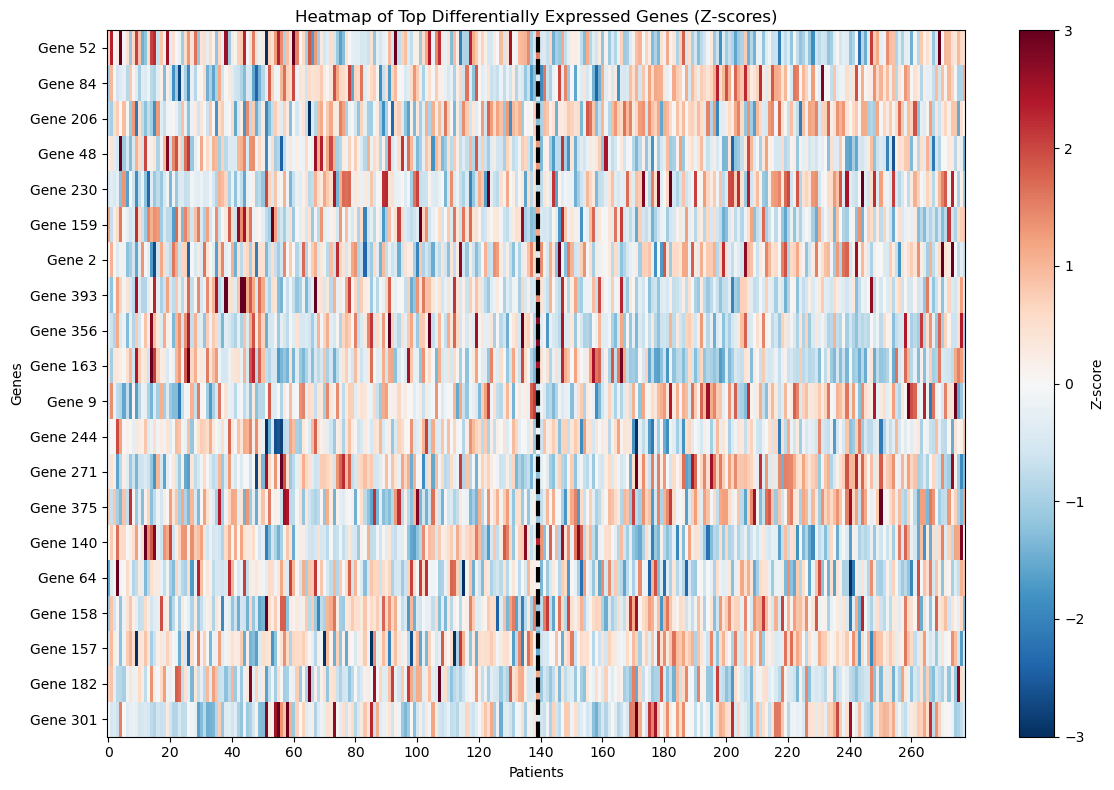

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the heatmap
cax = ax.imshow(top_genes_zscores_comb.T, cmap="RdBu_r", vmin=-3, vmax=3, aspect="auto")

# Add colorbar
cbar = fig.colorbar(cax)
cbar.set_label("Z-score")

# Set axis labels
ax.set_xlabel("Patients")
ax.set_ylabel("Genes")

# Set x-axis ticks and labels
ax.set_xticks(np.arange(0, n_patients * 2, 20))
ax.set_xticklabels(np.arange(0, n_patients * 2, 20))

# Set y-axis ticks and labels
ax.set_yticks(np.arange(top_n))
ax.set_yticklabels([f"Gene {idx}" for idx in top_genes_indices])

# Add a vertical line to separate groups
ax.axvline(x=n_patients, color="black", linestyle="--", linewidth=3)

# Add title
plt.title("Heatmap of Top Differentially Expressed Genes (Z-scores)")
plt.tight_layout()
plt.show()